***DATA LOADING***

In [ ]:
import os
path = '/content/drive/MyDrive/Men Women/train'
classes = os.listdir(path)
print(classes)

['Men', 'Women']


***DATA SPLITTING (train,test)***

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

base_dir = '/content/drive/MyDrive/Men Women'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
image_size=(200,200),
subset='training',
seed = 1,
validation_split=0.1,
       batch_size= 32)

test_datagen = image_dataset_from_directory(base_dir,
image_size=(200,200),
subset='validation',
seed = 1,
validation_split=0.1,
batch_size= 32)


Found 16 files belonging to 2 classes.
Using 15 files for training.
Found 16 files belonging to 2 classes.
Using 1 files for validation.


In [ ]:
import tensorflow as tf

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D


model = tf.keras.models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
layers.MaxPooling2D(2, 2),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D(2, 2),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D(2, 2),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D(2, 2),

layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.BatchNormalization(),
layers.Dense(512, activation='relu'),
layers.Dropout(0.1),
layers.BatchNormalization(),
layers.Dense(512, activation='relu'),
layers.Dropout(0.2),
layers.BatchNormalization(),
layers.Dense(1, activation='sigmoid') #output layer
])


In [ ]:
keras.utils.plot_model(
model,
show_shapes=True,
show_dtype=True,
show_layer_activations=True
)

model.compile(
loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

history = model.fit(train_datagen,
epochs=50,
validation_data=test_datagen)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.6667 - loss: 0.7498 - val_accuracy: 1.0000 - val_loss: 0.0117
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8667 - loss: 0.3794 - val_accuracy: 1.0000 - val_loss: 8.3411e-18
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9333 - loss: 0.2346 - val_accuracy: 1.0000 - val_loss: 1.0225e-05
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9333 - loss: 0.1673 - val_accuracy: 1.0000 - val_loss: 1.4452e-10
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0690 - val_accuracy: 1.0000 - val_loss: 1.1216e-14
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0594 - val_accuracy: 1.0000 - val_loss: 2.0339e-19
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0480 - val_accuracy: 1.0000 - val_loss: 8.8237e-21
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0170 - val_accuracy: 1.0000 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
[[1.1252269e-15]]
Men


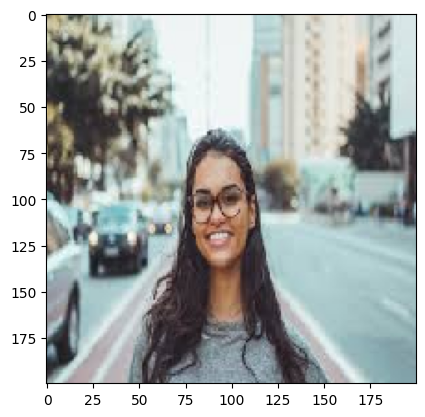

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

test_image= image.load_img("/content/drive/MyDrive/Men Women/test/Women/women1.jpeg",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)

if(result==1):
  print("Women")
else:
  print("Men")